In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
consumer_price_index_annually_df = pd.read_csv('../Datasets\\Consumer Price Index\\Consumer_Price_Index_Annually.csv')
consumer_price_index_monthly_df = pd.read_csv('../Datasets\\Consumer Price Index\\Consumer_Price_Index_Monthly.csv')
consumer_price_index_quarterly_df = pd.read_csv('../Datasets\\Consumer Price Index\\Consumer_Price_Index_Quarterly.csv')

# Consumer Price Annually

## Data Understanding

In [137]:
consumer_price_index_annually_df.head()

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2021,100.000000,2,NaN,NaN
1,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2022,100.020000,2,NaN,NaN
2,FCSA:DF_CPI_ANN(3.2.0),CPI_INDEX21,INDX,AE,A,FUR,FCSA,2023,103.223874,2,NaN,NaN
3,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG,PERCENT,AE,A,TEX,FCSA,2010,-4.960000,2,NaN,NaN
4,FCSA:DF_CPI_ANN(3.2.0),CPI_ANNCHG,PERCENT,AE,A,TEX,FCSA,2011,-1.870000,2,NaN,NaN


In [138]:
consumer_price_index_annually_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       369 non-null    object 
 1   MEASURE        369 non-null    object 
 2   UNIT_MEASURE   369 non-null    object 
 3   REF_AREA       369 non-null    object 
 4   FREQ           369 non-null    object 
 5   CPI_DIV        369 non-null    object 
 6   SOURCE_DETAIL  369 non-null    object 
 7   TIME_PERIOD    369 non-null    int64  
 8   OBS_VALUE      369 non-null    float64
 9   DECIMALS       369 non-null    int64  
 10  OBS_STATUS     0 non-null      float64
 11  UNIT_MULT      0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 34.7+ KB


In [139]:
for column in consumer_price_index_annually_df.columns:
    unique_values = consumer_price_index_annually_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       4
UNIT_MEASURE                  2
REF_AREA                      1
FREQ                          1
CPI_DIV                       14
SOURCE_DETAIL                 1
TIME_PERIOD                   14
OBS_VALUE                     327
DECIMALS                      1
OBS_STATUS                    0
UNIT_MULT                     0


In [140]:
for column in consumer_price_index_annually_df.columns:
    unique_values = consumer_price_index_annually_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_CPI_ANN(3.2.0)    369
Name: count, dtype: int64
MEASURE                       MEASURE
CPI_ANNCHG      156
CPI_INDEX14     143
CPI_INDEX21      42
CPI_ANNCHG21     28
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
INDX       185
PERCENT    184
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    369
Name: count, dtype: int64
FREQ                          FREQ
A    369
Name: count, dtype: int64
CPI_DIV                       CPI_DIV
FUR    28
TEX    28
HOU    28
COM    28
FNB    28
REC    28
TRN    28
RES    28
MIS    28
EDU    28
ALL    28
MED    28
TOB    28
INS     5
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSA    369
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2022    28
2023    28
2021    27
2010    26
2011    26
2012    26
2013    26
2014    26
2015    26
2016    26
2017    26
2018    26
2019    26
2020    26
Name: count, dtype: int64
OBS_VALUE

In [141]:
consumer_price_index_annually_df.duplicated().sum()

0

In [142]:
consumer_price_index_annually_df.isnull().sum()

DATAFLOW           0
MEASURE            0
UNIT_MEASURE       0
REF_AREA           0
FREQ               0
CPI_DIV            0
SOURCE_DETAIL      0
TIME_PERIOD        0
OBS_VALUE          0
DECIMALS           0
OBS_STATUS       369
UNIT_MULT        369
dtype: int64

array([[<Axes: title={'center': 'TIME_PERIOD'}>,
        <Axes: title={'center': 'OBS_VALUE'}>],
       [<Axes: title={'center': 'DECIMALS'}>,
        <Axes: title={'center': 'OBS_STATUS'}>],
       [<Axes: title={'center': 'UNIT_MULT'}>, <Axes: >]], dtype=object)

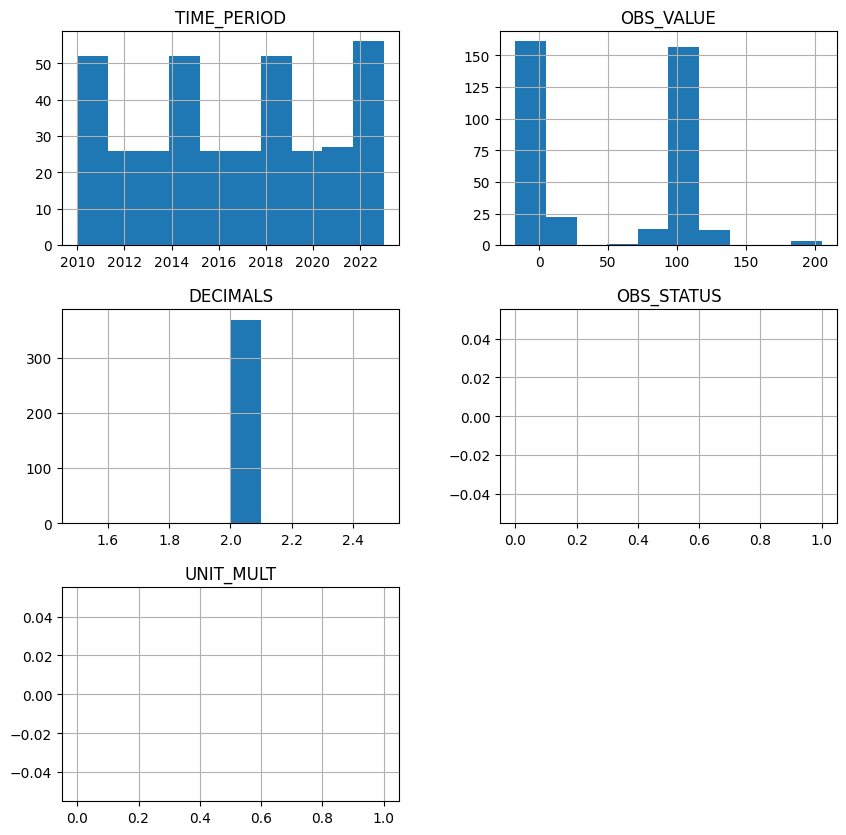

In [143]:
consumer_price_index_annually_df.hist(figsize=(10, 10))

## Data Cleaning

In [144]:
consumer_price_index_annually_df.drop(columns=['OBS_STATUS', 'UNIT_MULT'], inplace = True)

In [145]:
cols_to_drop = [col for col in consumer_price_index_annually_df.columns if consumer_price_index_annually_df[col].nunique() == 1]
consumer_price_index_annually_df = consumer_price_index_annually_df.drop(columns=cols_to_drop)

In [146]:
consumer_price_index_annually_df.rename(columns={'UNIT_MEASURE': 'Unit of Measure', 'MEASURE': 'Measure','CPI_DIV': 'CPI Division','TIME_PERIOD': 'Time Period', 'OBS_VALUE': 'Value'}, inplace=True)

In [147]:
consumer_price_index_annually_df['Measure'].replace({
    'CPI_INDEX21': 'Index number (base year 2021 = 100)',
    'CPI_INDEX14': 'Index number (base year 2014 = 100)',
    'CPI_ANNCHG': 'Annual Change (%)(base year 2014 = 100)',
    'CPI_ANNCHG21': 'Annual Change (%)(base year 2021 = 100)'
}, inplace=True)

C:\Users\Cody\AppData\Local\Temp\ipykernel_15812\4131448511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consumer_price_index_annually_df['Measure'].replace({


In [148]:
consumer_price_index_annually_df['Unit of Measure'].replace({
    'INDX': 'Index',
    'PERCENT': 'Percentage'
})

0           Index
1           Index
2           Index
3      Percentage
4      Percentage
          ...    
364    Percentage
365    Percentage
366    Percentage
367    Percentage
368    Percentage
Name: Unit of Measure, Length: 369, dtype: object

In [149]:
consumer_price_index_annually_df['CPI Division'] = consumer_price_index_annually_df['CPI Division'].replace({
    'ALL': 'All Items',
    'FNB': 'Food and Beverages',
    'TOB': 'Tobacco',
    'TEX': 'Textiles, Clothing and Footwear',
    'HOU': 'Housing, Water, Electricity, Gas',
    'FUR': 'Furniture and Household Goods',
    'MED': 'Medical Care',
    'TRN': 'Transportation',
    'COM': 'Communications',
    'REC': 'Recreation and Culture',
    'EDU': 'Education',
    'RES': 'Restaurants and Hotels',
    'MIS': 'Miscellaneous Goods and Services'
})

In [150]:
# consumer_price_index_annually_df.to_csv('Cleaned Datasets\\Consumer Price Index\\Consumer_Price_Index_Annually.csv', index=False)

# Consumer Price Monthly

In [151]:
consumer_price_index_monthly_df.head()

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-01,7.25,2,NaN,NaN
1,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-02,3.87,2,NaN,NaN
2,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-03,4.70,2,NaN,NaN
3,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-04,1.90,2,NaN,NaN
4,FCSA:DF_CPI(3.2.0),CPI_ANNCHG,PERCENT,AE,M,FUR,FCSA,2009-05,5.25,2,NaN,NaN


In [152]:
consumer_price_index_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7361 entries, 0 to 7360
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       7361 non-null   object 
 1   MEASURE        7361 non-null   object 
 2   UNIT_MEASURE   7361 non-null   object 
 3   REF_AREA       7361 non-null   object 
 4   FREQ           7361 non-null   object 
 5   CPI_DIV        7361 non-null   object 
 6   SOURCE_DETAIL  7361 non-null   object 
 7   TIME_PERIOD    7361 non-null   object 
 8   OBS_VALUE      7361 non-null   float64
 9   DECIMALS       7361 non-null   int64  
 10  OBS_STATUS     0 non-null      float64
 11  UNIT_MULT      0 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 690.2+ KB


In [153]:
for column in consumer_price_index_monthly_df.columns:
    unique_values = consumer_price_index_monthly_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       5
UNIT_MEASURE                  2
REF_AREA                      1
FREQ                          1
CPI_DIV                       14
SOURCE_DETAIL                 1
TIME_PERIOD                   199
OBS_VALUE                     3415
DECIMALS                      1
OBS_STATUS                    0
UNIT_MULT                     0


In [154]:
for column in consumer_price_index_monthly_df.columns:
    unique_values = consumer_price_index_monthly_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_CPI(3.2.0)    7361
Name: count, dtype: int64
MEASURE                       MEASURE
CPI_MTHCHG      2444
CPI_INDEX14     2021
CPI_ANNCHG      1872
CPI_INDEX21      602
CPI_ANNCHG21     422
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
PERCENT    4731
INDX       2630
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    7361
Name: count, dtype: int64
FREQ                          FREQ
M    7361
Name: count, dtype: int64
CPI_DIV                       CPI_DIV
FUR    560
EDU    560
MED    560
TRN    560
FNB    560
REC    560
TEX    560
TOB    560
HOU    560
RES    560
COM    560
MIS    560
ALL    560
INS     81
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSA    7361
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2023-08    42
2023-11    42
2023-01    42
2023-02    42
2023-03    42
           ..
2022-04    14
2022-03    14
2022-02    14
2022-01    14
2008-01 

In [155]:
consumer_price_index_monthly_df.duplicated().sum()

0

In [156]:
consumer_price_index_monthly_df.isnull().sum()

DATAFLOW            0
MEASURE             0
UNIT_MEASURE        0
REF_AREA            0
FREQ                0
CPI_DIV             0
SOURCE_DETAIL       0
TIME_PERIOD         0
OBS_VALUE           0
DECIMALS            0
OBS_STATUS       7361
UNIT_MULT        7361
dtype: int64

array([[<Axes: title={'center': 'OBS_VALUE'}>,
        <Axes: title={'center': 'DECIMALS'}>],
       [<Axes: title={'center': 'OBS_STATUS'}>,
        <Axes: title={'center': 'UNIT_MULT'}>]], dtype=object)

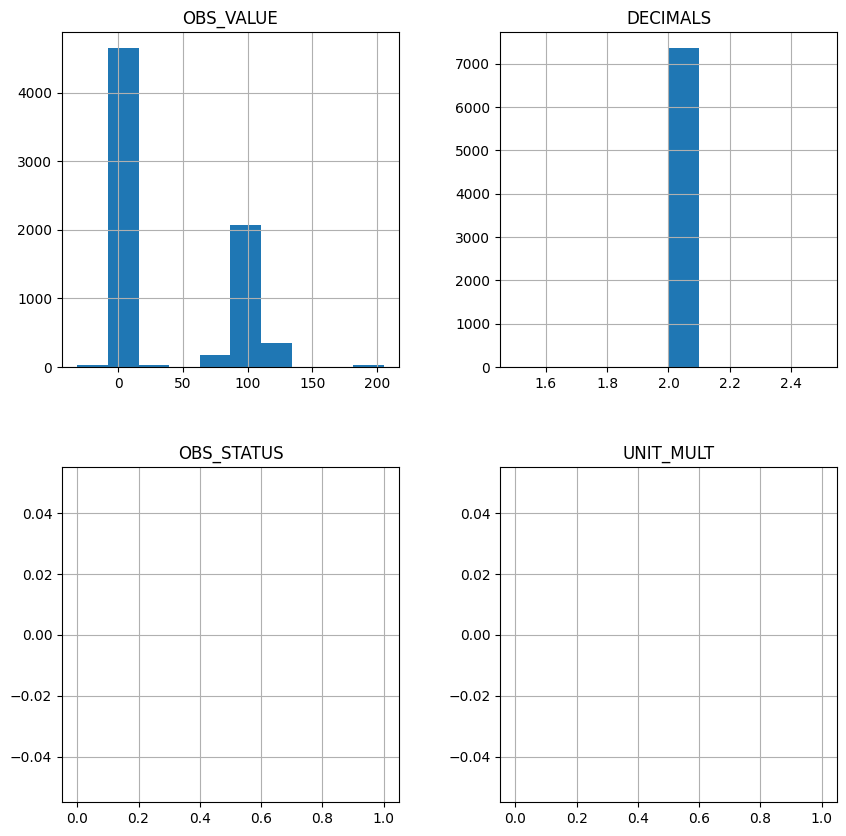

In [157]:
consumer_price_index_monthly_df.hist(figsize=(10, 10))

## Data Cleaning

In [158]:
consumer_price_index_monthly_df.drop(columns=['OBS_STATUS', 'UNIT_MULT'], inplace = True)

In [159]:
cols_to_drop = [col for col in consumer_price_index_monthly_df.columns if consumer_price_index_monthly_df[col].nunique() == 1]
consumer_price_index_monthly_df = consumer_price_index_monthly_df.drop(columns=cols_to_drop)

In [160]:
consumer_price_index_monthly_df.rename(columns={'UNIT_MEASURE': 'Unit of Measure', 'MEASURE': 'Measure','CPI_DIV': 'CPI Division','TIME_PERIOD': 'Time Period', 'OBS_VALUE': 'Value'}, inplace=True)

In [161]:
consumer_price_index_monthly_df['Measure'] = consumer_price_index_monthly_df['Measure'].replace({
    'CPI_INDEX21': 'Index number (base year 2021 = 100)',
    'CPI_INDEX14': 'Index number (base year 2014 = 100)',
    'CPI_ANNCHG': 'Annual Change (%)(base year 2014 = 100)',
    'CPI_ANNCHG21': 'Annual Change (%)(base year 2021 = 100)',
    'CPI_MTHCHG': 'Monthly change (%) (base year 2014 =100)',
    'CPI_MTHCHG21': 'Monthly change (%) (base year 2021 =100)'
})

In [162]:
consumer_price_index_monthly_df['Unit of Measure'] = consumer_price_index_monthly_df['Unit of Measure'].replace({
    'INDX': 'Index',
    'PERCENT': 'Percentage'
})

In [163]:
consumer_price_index_monthly_df['CPI Division'] = consumer_price_index_monthly_df['CPI Division'].replace({
    'ALL': 'All Items',
    'FNB': 'Food and Beverages',
    'TOB': 'Tobacco',
    'TEX': 'Textiles, Clothing and Footwear',
    'HOU': 'Housing, Water, Electricity, Gas',
    'FUR': 'Furniture and Household Goods',
    'MED': 'Medical Care',
    'TRN': 'Transportation',
    'COM': 'Communications',
    'REC': 'Recreation and Culture',
    'EDU': 'Education',
    'RES': 'Restaurants and Hotels',
    'MIS': 'Miscellaneous Goods and Services'
})


In [164]:
# consumer_price_index_monthly_df.to_csv('Cleaned Datasets\\Consumer Price Index\\Consumer_Price_Index_Monthly.csv', index=False)

# Consumer Price Quarterly

## Data Understanding

In [165]:
consumer_price_index_quarterly_df.head()

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,CPI_DIV,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS,OBS_STATUS,UNIT_MULT
0,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q1,-1.851788,2,NaN,NaN
1,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q2,-1.001258,2,NaN,NaN
2,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q3,0.119038,2,NaN,NaN
3,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2022-Q4,1.605925,2,NaN,NaN
4,FCSA:DF_CPI_Q(3.2.0),CPI_QCHNG,PERCENT,AE,Q,HOU,FCSA,2023-Q1,2.451617,2,NaN,NaN


In [166]:
consumer_price_index_quarterly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATAFLOW       112 non-null    object 
 1   MEASURE        112 non-null    object 
 2   UNIT_MEASURE   112 non-null    object 
 3   REF_AREA       112 non-null    object 
 4   FREQ           112 non-null    object 
 5   CPI_DIV        112 non-null    object 
 6   SOURCE_DETAIL  112 non-null    object 
 7   TIME_PERIOD    112 non-null    object 
 8   OBS_VALUE      112 non-null    float64
 9   DECIMALS       112 non-null    int64  
 10  OBS_STATUS     0 non-null      float64
 11  UNIT_MULT      0 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 10.6+ KB


In [167]:
for column in consumer_price_index_quarterly_df.columns:
    unique_values = consumer_price_index_quarterly_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      1
MEASURE                       1
UNIT_MEASURE                  1
REF_AREA                      1
FREQ                          1
CPI_DIV                       14
SOURCE_DETAIL                 1
TIME_PERIOD                   8
OBS_VALUE                     112
DECIMALS                      1
OBS_STATUS                    0
UNIT_MULT                     0


In [168]:
for column in consumer_price_index_quarterly_df.columns:
    unique_values = consumer_price_index_quarterly_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

DATAFLOW                      DATAFLOW
FCSA:DF_CPI_Q(3.2.0)    112
Name: count, dtype: int64
MEASURE                       MEASURE
CPI_QCHNG    112
Name: count, dtype: int64
UNIT_MEASURE                  UNIT_MEASURE
PERCENT    112
Name: count, dtype: int64
REF_AREA                      REF_AREA
AE    112
Name: count, dtype: int64
FREQ                          FREQ
Q    112
Name: count, dtype: int64
CPI_DIV                       CPI_DIV
HOU    8
RES    8
FNB    8
EDU    8
COM    8
REC    8
ALL    8
FUR    8
MIS    8
TRN    8
TOB    8
INS    8
MED    8
TEX    8
Name: count, dtype: int64
SOURCE_DETAIL                 SOURCE_DETAIL
FCSA    112
Name: count, dtype: int64
TIME_PERIOD                   TIME_PERIOD
2022-Q1    14
2022-Q2    14
2022-Q3    14
2022-Q4    14
2023-Q1    14
2023-Q2    14
2023-Q3    14
2023-Q4    14
Name: count, dtype: int64
OBS_VALUE                     OBS_VALUE
-1.851788    1
-1.001258    1
-0.776307    1
 0.507918    1
 1.980920    1
            ..
 0.598787    1


In [169]:
consumer_price_index_quarterly_df.duplicated().sum()

0

In [170]:
consumer_price_index_quarterly_df.isnull().sum()

DATAFLOW           0
MEASURE            0
UNIT_MEASURE       0
REF_AREA           0
FREQ               0
CPI_DIV            0
SOURCE_DETAIL      0
TIME_PERIOD        0
OBS_VALUE          0
DECIMALS           0
OBS_STATUS       112
UNIT_MULT        112
dtype: int64

array([[<Axes: title={'center': 'OBS_VALUE'}>,
        <Axes: title={'center': 'DECIMALS'}>],
       [<Axes: title={'center': 'OBS_STATUS'}>,
        <Axes: title={'center': 'UNIT_MULT'}>]], dtype=object)

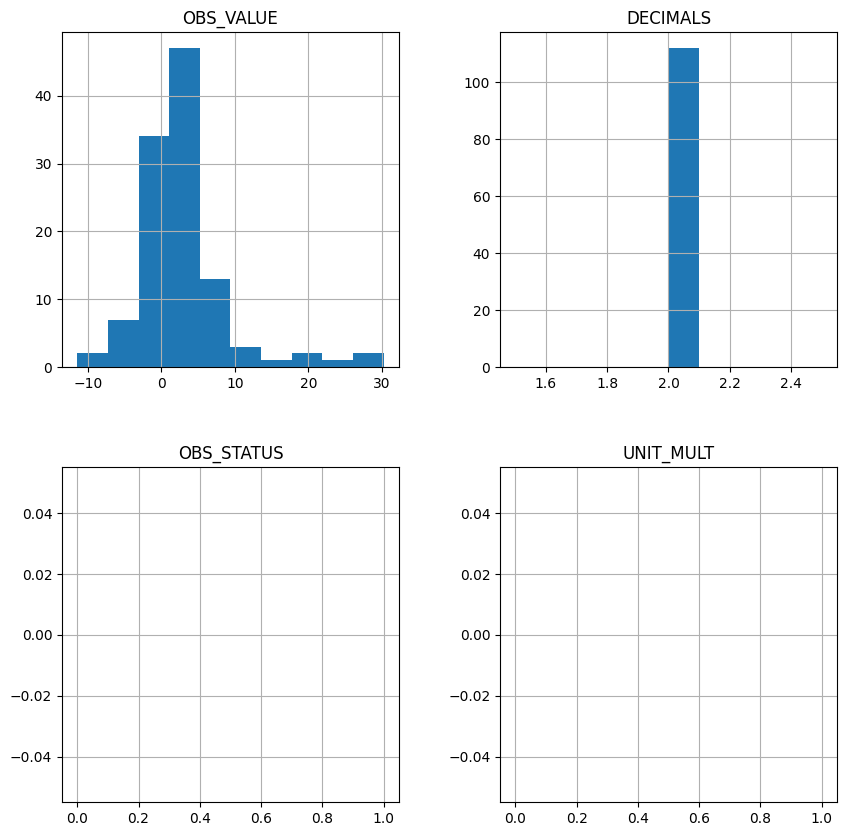

In [171]:
consumer_price_index_quarterly_df.hist(figsize=(10, 10))

## Data Cleaning

In [172]:
consumer_price_index_quarterly_df.drop(columns=['OBS_STATUS', 'UNIT_MULT'], inplace = True)

In [173]:
cols_to_drop = [col for col in consumer_price_index_quarterly_df.columns if consumer_price_index_quarterly_df[col].nunique() == 1]
consumer_price_index_quarterly_df = consumer_price_index_quarterly_df.drop(columns=cols_to_drop)

In [174]:
consumer_price_index_quarterly_df.rename(columns={'CPI_DIV': 'CPI Division','TIME_PERIOD': 'Time Period', 'OBS_VALUE': 'Value (%)'}, inplace=True)

In [175]:
consumer_price_index_quarterly_df['CPI Division'] = consumer_price_index_quarterly_df['CPI Division'].replace({
    'ALL': 'All Items',
    'FNB': 'Food and Beverages',
    'TOB': 'Tobacco',
    'TEX': 'Textiles, Clothing and Footwear',
    'HOU': 'Housing, Water, Electricity, Gas',
    'FUR': 'Furniture and Household Goods',
    'MED': 'Medical Care',
    'TRN': 'Transportation',
    'COM': 'Communications',
    'REC': 'Recreation and Culture',
    'EDU': 'Education',
    'RES': 'Restaurants and Hotels',
    'MIS': 'Miscellaneous Goods and Services'
})


In [ ]:
# consumer_price_index_quarterly_df.to_csv('Cleaned Datasets\\Consumer Price Index\\Consumer_Price_Index_Quarterly.csv', index=False)

# Pumping data into Mongodb

In [177]:
# from pymongo import MongoClient
# from dotenv import load_dotenv
# import os

# # Connect to MongoDB
# load_dotenv()

# client = MongoClient(os.environ['MONGODB_URI_1'])  # Uses the connection string from your .env file
# db = client['tourism_db']

# # Convert DataFrame to dictionary
# consumer_price_index_annually_df = consumer_price_index_annually_df.to_dict('records')
# consumer_price_index_monthly_df = consumer_price_index_monthly_df.to_dict('records')
# consumer_price_index_quarterly_df = consumer_price_index_quarterly_df.to_dict('records')

# # Insert into MongoDB collections
# db['consumer_price_index_annually_df'].insert_many(consumer_price_index_annually_df)
# db['consumer_price_index_monthly_df'].insert_many(consumer_price_index_monthly_df)
# db['consumer_price_index_quarterly_df'].insert_many(consumer_price_index_quarterly_df)

# print("Data pumped into MongoDB successfully!")

Data pumped into MongoDB successfully!
